# The Idea
The CoVid and Saudi Arabia/Russia Oil Crisis presented a once in a lifetime opportunity to buy companies at a significant discount, but which ones?. The idea I had was to measure the worlds market response to the CoVid and Saudi oil production effect and invest in sectors that were positively affected by Covid and resistant to oil price. There are very advanced maths that could be applied, but to be honest I dont know them, so this is a non-quant approach to quantish trading. 

I have used algorithms to trade securities in the past, and I made a bit of money doing it, but this time the markets are different. I had no idea of what sectors would meet my objectives, and I wasnt sure if it was possible to seperate the CoVid and Saudi effect and leverage those observations against a trading strategy. My gut feel was that it probably wasnt possible to seperate the two effects and that there would be no way to identify companies that would resist or thrive, but I felt that it was clear that energy based companies would die and healthcare based companies would thrive, but any responsible investor checks their hypothesis before investing their own money.

# How This Project Works
The project has several components, and not all are in this notebook: 1) a securities scraper that collects the data I needed for my project; 2) some support files that contain the seed data required to make the securities data work; and 3) this document that contains the main body of work.

### A Securities Data Scraper:
The securities data scraper pulls data from the Yahoo Finance API. Its a Jupyter notebook that opens a csv file (tickers3.csv) that holders the ticker names. It loops through the tickers, pokes the API, retrieves the basic ticker data like close, daily high, daily low and so on. After its built the large data frame of securities data it appends some commodities like Brent Oil, Gold, silver, coffee and collects the commodities data. WIth the full dagtaframe, dictionaries are imported and applied (indust_dict.txt, sect_dict.txt, country_dict.txt) that map the type of ticker as new columns for each ticker type in the dataframe. Then it saves the dataframe as a csv called tkr_data.csv. The tkr_data.csv file is the main data source for the data adventure and main project housed by this workbook and is dicussed below.

### Main Project and Data Adventure:
This notebook houses the main parts of the project and its written as on the fly data science data adventure. I start by making assertions about the investment strategy and exploring the merit of each assertion. The exploration of each assertion contains the code to generate the data and graphics to motivate the exploration. 

Handling the data is very repetitive when we explore each ticker type so I made an importable .py that data holds a two data handler classes called row_data and tickers. row_data opens the tkr_data.csv (the ticker data) and the CoVid data that was downloaded from the WHO website called WHO-COVID-19-global-data.csv'. the CoVid data is parsed by country. While it would be interesting to review the data by country, I had another objective, so the class aggregates all the CoVid data by day to make it comparable to the securities data and passes back a dataframe. The other data handler is called ticker_data. This handler makes easy work of filtering out a specific security and tarting up the dataframe for easy plotting. 

### Perspective
The work is below is presented from a data naive perspective. No research was applied to prior to emabarking on this data adventure. 

The charts could be annotated better and the observations could be better supported by quoting hard stats like the mean, and correlation coefficient. I felt that it was more important to show off the skills I picked up from the course, notably: building lists of lists through appending, building classes and object based programming, better error trapping, if and while loops, improved understanding of dictionaries and more. List and dict comprehensions were a great add, but unfortunately I could find a use for them here. The other project I was considering on presenting uses them alot. Perhaps next class. 

Lastly, the work presented is the start of a deeper body of work and I was challenged to know when to stop or how much detail to go to.  

# Assertion 1:
Its impossible to identify a sector, or even a collection of shares, for investment that resists oil price and gains by the CoVid crisis. The Covid and Saudi effect cant be separated because they were nearly coincident in time of initialization and depend on eachother by virtue of the global economic shut down. On January 5th, 2020, The World Health Organisation announced that Covid was an outbreak disease. On march 10th 2020, Saudi and Russia bickered and Saudi announced that on April 1 2020 it would increase production by 26%. The market collapsed. At one point WTI was priced at -32USD/barrel. This means that buyers of oil were willing to take a loss by paying others to buy it back. What links the CoVid and the Saudi effect (really Brent oil price) is that the global lock down resulted in dramatic drops in world oil consumption. 

# Assertion 2:
The Energy industry will collapse, the Health industry will thrive, consumer staples will be resistant to any change, and discretionary consumer items will collapse, and gaming will see sharp increases. I admit, this is a fairly narrow minded list of reactives, but thats what I walked into this with. Lets see what data analysis does for me.

# Data!
Below is a list of the I pulled data for. We wont be using all of them, but I was on a role and the code pulls it all:
* CoVid Cases
* CoVid Deaths
* Oil Price
* Industrial Sector ETFs
* Country ETFs
* Industry ETFs
* Currency ETFs

CoVid Cases are derived from the WHO:
https://covid19.who.int/?gclid=Cj0KCQjwn7j2BRDrARIsAHJkxmzJ-AsRR-HHClZdu8GCYzKnoOhFPV0AfSgJCI7IGQ8jGliZAILj8UsaAgicEALw_wcB

Oil pricing is derived from FRED and Yahoo Finance:
https://fred.stlouisfed.org/tags/series?t=oil

I plainly lack the skills (and the time) to cluster companies into sector representative groups. This involves reading the prospectus for each company, determining their core business and classifying them. Consider General Electric for example. What do these guys do? Well just about Everything it turns out. What about Bayer? These guys dont just make aspirin anymore. They run one 
of the worlds largest Agribusinesses. 

Enter Exchange Traded Funds. ETFs are a collection of securities that on aggregate represent a sector, industry, country or whatever. A well known ETF (of sorts) is the S&P 500. Some poor soul(S) read all the data required to cluster a group of companies as representative of the American economy and called it the S&P index. But this is just one. There are thousands of others. ETFs trade in the same way as any other security.

Some time ago I wrote a script that scraped some key websites and collected all the ETFs for 
Industrial sectors, Countries, Industries, and Currencies. Unfortunately, there are dozens of ETFs for each classification above and each performs differently. Some were kicking butt but others didnt change at all over the crisis. I still havent worked out a good way to aggregate multiple ETFs for a sector and doing so is beyond the scope of this work. I suspect it might be a dissertation on its own. To get around this use the ETF that has the highest trade price at the beginning of 2020 for each sector. 

There is another issue that needs mention. I ignored lag time in reporting of new cases and the time
lag the market reuires to respond. This is tantamount to assuming an efficient market. We know that there is no such thing as an efficient market, but for this study thats what I did. 

The CoVid and Saudi crisis are never before seen events in world history so we have no idea how the market will respond or how long it will take to respond. It might need time to contemplate 
a response, but we have no idea how long. An excellent extension to this work might be to deploy some sort of optimization algorithm to select the best time lag to use. Perhaps another time.

# Data Classes

## Oilprice  
'Brent','WTI','WCS']

## Sectors 
'Technology','Real Estate','Healthcare','Financials','Consumer Staples',
'Materials','Utilities','Consumer Discretionary','Industrials','Energy','Telecom']

## Countries 
'Argentina','Australia','BICK','Brazil','Broad Africa','Broad Asia Pacific ex-Japan',
'Broad Asia-Broad','Broad Developed Asia Pacific','Broad Developed Europe',
'Broad Developed Markets','Broad Emerging Asia Pacific','Broad Emerging Europe',
'Broad Emerging Markets','Broad Frontier Markets','Broad Global','Broad Global ex-U.S.',
'Broad Latin America','Broad Middle East','Broad North America','Canada','Chile','China',
'Chindia','Colombia','Developed Asia Pacific ex-Japan','EAFE','Egypt','Germany','Greece',
'Hong Kong','India','Indonesia','Ireland','Israel','Japan','Malaysia','Mexico','New Zealand',
'Nigeria','Pakistan','Peru','Philippines','Portugal','Qatar','Russia','Saudi Arabia',
'South Korea','Switzerland','Taiwan','Thailand','U.S.','United Arab Emirates','United Kingdom',
'Vietnam']

## Industries
'Broad Technology','Broad Real Estate','Broad Healthcare','Broad Financials',
'Broad Consumer Staples','Gold Miners','Broad Utilities','Broad Consumer Discretionary',
'Broad Industrials','Internet','Oil & Gas Exploration & Production','Media','Biotechnology',
'Medical Devices','MLP','Software','Natural Resources','Infrastructure','Aerospace & Defense',
'Semiconductors','Broad Materials','Broad Telecom','Internet Architecture','Banks',
'Water','Regional Banks','Financial Services','Healthcare Services','Consumer Services',
'Insurance','Mortgage REITs','Clean Energy','Agribusiness','Homebuilders','Consumer Goods',
'Solar Energy','Broad Energy','Cloud Computing','Silver Miners','Lithium','Transportation',
'Pharmaceutical','Residential Real Estate','Airlines','Oil Equipment & Services',
'Food & Beverage','Retail','Cleantech','Timber','Metals & Mining','Broker-Dealers',
'Business Development Company','Gaming','Private Equity','Uranium','Social Media',
'Wind Energy','Community Banks','Natural Gas','Networking','Hard Assets Producers',
'YieldCos','Industrial/Office Real Estate','Copper Miners','Steel','Environmental Services',
'Capital Markets','Energy Infrastructure','Shipping','Coal','Nuclear Energy','Automotive',
'Unconventional Oil & Natural Gas','Fertilizer','Electric Energy Infrastructure',
'Engineering & Construction','Retail Real Estate']


Lets begin with our first assertion: oil price and covid are not separable

tkr from class BZ=F
df shape: (112, 13)
df shape: (109, 13)
Done


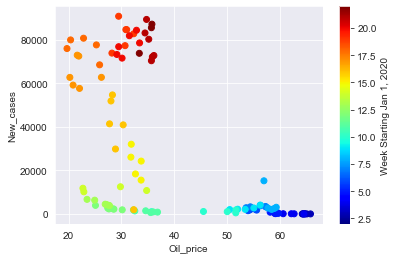

In [1]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import numpy as np
import row_cov
plt.style.use('dark_background')

#row_cov is a data handler. 
from row_cov import row_data
oil_vs_newcases = row_data('BZ=F','New_cases')
df_cross = oil_vs_newcases.row_cov_data()

x = df_cross['BZ=F_Close']
y = df_cross['New_cases']
sns.set_style("darkgrid")

plt.scatter(x,y, c=df_cross['WeekNum'], cmap = 'jet' )
plt.xlabel('Oil_price')
plt.ylabel('New_cases')

cbar = plt.colorbar()
cbar.set_label('Week Starting Jan 1, 2020')
plt.show()


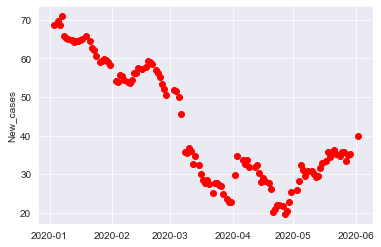

In [2]:
"""The chart above plots new CoVid cases against Brent oil price. The points are colored by date. 
The specific datestamps on the data are not important, the texture and overall features 
are more important. Cool colors are old, hot colors are recent. 

Its pretty clear that the there are at least three realtionships, that are consistent in 
time. Consistent in time means that with increasing time from Jan 01, 2020 to present, we dont see
data from April trespassing on data from February. There is a smooth day by day transition 
where unique trends emerge in parcels of time. This is useful data, and its rare to see.

Lets break the data up into two groups first and discuss. We can look at oil price wrt to time and look for inflection points, or changes 
in plot character to help pick a time for categorization.

"""
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import numpy as np

from row_cov import tickers

oil_data = tickers('BZ=F')
df = oil_data.ticker_data()

x = df['DateStamp']
y = df['close']

sns.set_style("darkgrid")
plt.scatter(x,y, c='red')
plt.ylabel('New_cases')
plt.show()

C:\Users\KarlN\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
C:\Users\KarlN\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Text(0, 0.5, 'New_cases')

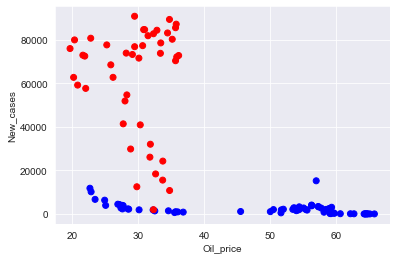

In [2]:
"""
At an oil price of about $23/bbl and around 15,000 new cases per day, oil price jumps 
to around $30/bbl. This is evidence we can use. By the way, i prefer to plot price data
as a scatterplot in this case. Lines imply continuity, but we are looking for discontinuities and
these are highlighted better as points. 

great resource: https://ourcodingclub.github.io/tutorials/pandas-time-series/

As promised, Saudi increased production on April 1, 2020, but oil price decreased as soon as 
they announced their plans. On April 2nd, Trump announced that he spoke to key stakeholders and 
expected a cut of 10MM bbl from Saudi and Russia. Its here that we find the first break in the 
data grouping. 
"""

df_cross['Group'] = 1
df_cross['Color'] = 'blue'

split_date = pd.datetime(2020,4,2).strftime('%Y-%m-%d')
df_cross['Group'].loc[df_cross['DateStamp'] >= split_date] = 2
df_cross['Color'].loc[df_cross['Group'] == 2 ] = 'red'

x = df_cross['BZ=F_Close']
y = df_cross['New_cases']
sns.set_style("darkgrid")
plt.scatter(x,y, c=df_cross['Color'])
plt.xlabel('Oil_price')
plt.ylabel('New_cases')


C:\Users\KarlN\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from ipykernel import kernelapp as app


Text(0, 0.5, 'New_cases')

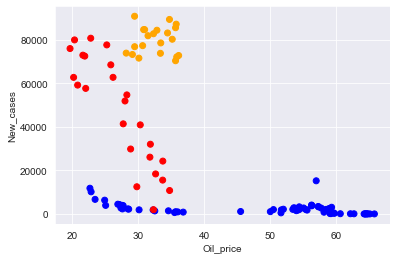

In [4]:
"""We get pretty close to isolating what I call the first group where oil price and new covid
cases show a strong relationship. What I find interesting here is that early on in the CoVid 
crisis, there was little to no correlation between the number of new cases world wide and oil price, the
group I call group 1 and colored blue. It wasnt until oil price hit ~$30/bbl. Then in April, 
a very different character, where there is a strong relationship. Then at around May 4th 2020,
there was absolutely no correlation between oil price and new cases of CoVid, see the chart below.
What happened on May 4th? Europe announced that it was opening up, Warren Buffet sold off all his 
airline shares. The chart below shows the three groups"""

"""
Sometimes this cell does work. I dont know why. The work around is to rerun the preceding cell 
and then run this one again.
"""

split_date = pd.datetime(2020,5,4).strftime('%Y-%m-%d')
df_cross['Group'].loc[df_cross['DateStamp'] >= split_date] = 3
df_cross['Color'].loc[df_cross['Group'] == 3 ] = 'orange'

x = df_cross['BZ=F_Close']
y = df_cross['New_cases']
sns.set_style("darkgrid")
plt.scatter(x,y, c=df_cross['Color'])
plt.xlabel('Oil_price')
plt.ylabel('New_cases')

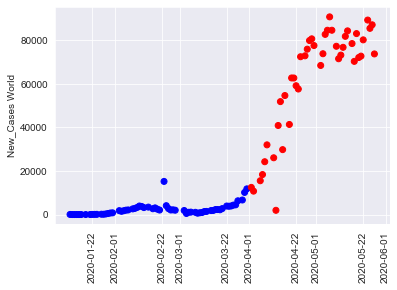

In [3]:
"""We could dig deeper into the chart above, and we dont even need statistics or linear 
regression to tell us whats going on and help us decide if these is a useful path for 
uncovering where to invest and satisfy the first assertion. 

The blue data shows that from the inception of the CoVid crisis and during the Saudi crisis,
oil price swung from $68/bbl to $22/bbl and reported CoVid cases ranged from zeroish to ~5,000
- a relatively small proportion of cases. It wasnt until oil price dropped to ~26/bbl that a 
very mild correlation started to manifest. Then the Trump tweet on April 4th changed 
everything. What the blue data shows is the beginning of the collapse of the global economy.
The world hadnt wrestled with what to do yet. There is no way to use this data to pick 
securities. 

The red data shows how the CoVid lockdown supressed world oil consumption and drove down oil 
prices down to around the ~$19/bbl mark. If this relationship persisted it would be useful for 
identifying future investment, 

Over the time frame shown by the orange cluster of data, there is no relationship that can be used
to identify investment opportunities

"""

x = df_cross['DateStamp']
y = df_cross['New_cases']

sns.set_style("darkgrid")
plt.scatter(x,y, c=df_cross['Color'])
plt.ylabel('New_Cases World')
degrees = 90
plt.xticks(rotation=degrees)

plt.show()

In [5]:
"""Lets see if a M:P can do better"""

#x = df_cross['BZ=F_Close']
#y = df_cross['New_cases']

#from sklearn.model_selection import train_test_split
#print(X_train)
#print()
#print(X_test)
#x_train, x_test, y_train, y_test = train_test_split(x, y)

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
# Fit only to the training data
#scaler.fit(x_train)


'Lets see if a M:P can do better'

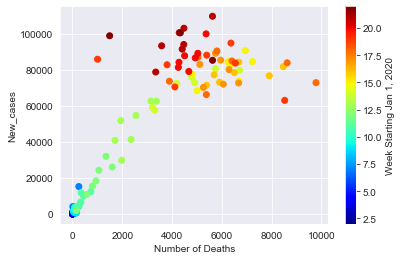

In [6]:
"""
What about new deaths and cumulative deaths? If new cases and new deaths
are correlated then it doesnt matter because they are equivalent data sources. The chart below
shows that there is some correlation, though non-linear. 

The problem with death, its definition and when does it occur, and whats its root causes are: 
https://en.wikipedia.org/wiki/Death#:~:text=Death%20is%20the%20cessation%20of,trauma%20resulting%20in%20fatal%20injury.

It is possible that some deaths were not caused solely by CoVid so new deaths and cumulatve deaths 
are dirty data. 

Furthermore, according to local medical professionals and the WHO, countries did not report death 
in as timely a fashion as they reported new cases.

Lastly, the data is suspicious in my opinion, so I dont use it.

"""

df_cov = pd.read_csv('WHO-COVID-19-global-data.csv')
df_cov['DateStamp'] = df_cov['Date_reported']
df_cov['DateStamp'] = pd.to_datetime(df_cov['DateStamp'])
df_cov.index = df_cov['DateStamp']
#df_cov[df_cov['DateStamp'].index.week

df_cov_agg = df_cov.resample('d').sum()
df_cov_agg['DateStamp'] = df_cov_agg.index

x = df_cov_agg['New_deaths']
y = df_cov_agg['New_cases']
sns.set_style("darkgrid")

plt.scatter(x,y, c=df_cov_agg['DateStamp'].index.week, cmap = 'jet' )
plt.xlabel('Number of Deaths')
plt.ylabel('New_cases')

cbar = plt.colorbar()
cbar.set_label('Week Starting Jan 1, 2020')
plt.show()



In [ ]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import numpy as np

import row_cov
from row_cov import row_data

"""
## Assertion 2

Recall that I claim that the health industry will flourish and the Energy Industry will collapse.

There are alot of ETFs representing each industry. I selected the ETF that performed the best for 
the health and energy industries, see below.
"""

import pandas as pd
df_tkr = pd.read_csv('tkr_data.csv')


df_health = df_tkr[df_tkr['Industry'] == 'Healthcare']
uniq_health = df_health['ticker'].unique()
df_health.to_csv('health_tkrs.csv', index=True)
print('There are {} unique Healhcare ETFs'.format(len(uniq_health)))
max_h_tkr = df_health['ticker'].loc[df_health['close'].idxmax()] 
max_h_val = df_health['close'].loc[df_health['close'].idxmax()]
print('The Health ETF with the highest per share value is {} at a value of {}'.format(max_h_tkr, max_h_val))
df_health = df_tkr[df_tkr['ticker'] == max_h_tkr]

df_energy = df_tkr[df_tkr['Industry'] == 'Energy']
uniq_energy = df_energy['ticker'].unique()
df_energy.to_csv('energy_tkrs.csv', index=True)
print('There are {} unique Energy ETFs'.format(len(uniq_energy)))
max_e_tkr = df_energy['ticker'].loc[df_energy['close'].idxmax()] 
max_e_val = df_energy['close'].loc[df_energy['close'].idxmax()]
print('The Health ETF with the highest per share value is {} at a value of {}'.format(max_e_tkr, max_e_val))
df_energy = df_tkr[df_tkr['ticker'] == max_e_tkr]



In [ ]:
"""
There are 55 different health ETFs. The best performing is IHI with a 
current ETF price of $277.14USD

There are 76 different energy ETFs. The best performing is GUSH with 
a current ETF price of $1600.8USD

Plotting these shows how they performed over the crisis:

"""
health_data = tickers(max_h_tkr)
df_health = health_data.ticker_data()

energy_data = tickers(max_e_tkr)
df_energy = energy_data.ticker_data()

xh = df_health['DateStamp']
yh = df_health['close']


xe = df_energy['DateStamp']
ye = df_energy['close']

sns.set_style("darkgrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].plot(xh, yh, c='red')
axes[0].title.set_text('Health ETF (ticker={})'.format(max_h_tkr))
axes[0].set_ylabel('ETF Price (USD)')
axes[0].xaxis.set_tick_params(rotation=45)
axes[1].plot(xe, ye, c='black')
axes[1].title.set_text('Energy ETF (ticker={})'.format(max_e_tkr))
axes[1].set_ylabel('ETF Price (USD)')
axes[1].xaxis.set_tick_params(rotation=45)
fig.tight_layout()

#cbar = plt.colorbar()
#cbar.set_label('Week Starting Jan 1, 2020')
plt.show()


In [ ]:
"""
The health industry took a fairly significant loss in value at the peak of the crisis, but it 
bounced back quite nicely. If only I had taken advantage of this. 

Its pretty clear that the oil and gas industry has not yet recovered. It will likely take 
years. 

The lowest point in value occured nearly at the same time for health and oil gas. 

Lets see how they performed in time against CoVid
"""

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# Using my data handler:
health_vs_newcases = row_data(max_h_tkr,'New_cases')
df_cross_h = health_vs_newcases.row_cov_data()
energy_vs_newcases = row_data(max_e_tkr,'New_cases')
df_cross_e = energy_vs_newcases.row_cov_data()

hcolname = max_h_tkr+'_Close'
xh = df_cross_h[hcolname]
yh = df_cross_h['New_cases']
lenh = [df_cross_h['WeekNum']]

ecolname = max_e_tkr+'_Close'
xe = df_cross_e[ecolname]
ye = df_cross_e['New_cases']

sns.set_style("darkgrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].scatter(xh, yh, c=df_cross_h['WeekNum'], cmap = 'jet')
axes[0].title.set_text('Health ETF ({})'.format(hcolname))
axes[0].set_xlabel('ETF Price (USD)')
axes[0].set_ylabel('New CoVid Cases World')
axes[1].scatter(xe, ye, c=df_cross_h['WeekNum'], cmap = 'jet')
axes[1].title.set_text('Energy ETF ({})'.format(ecolname))
axes[1].set_xlabel('ETF Price (USD)')
axes[1].set_ylabel('New CoVid Cases World')
fig.tight_layout()

cmap = mpl.cm.jet
max_week = df_cross_h['WeekNum'].max()
norm = mpl.colors.Normalize(vmin=1, vmax=max_week)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), label='Numner of Weeks')

plt.show()


In [ ]:
"""



Conclusion

Unfortunately this work has only two actionable observations: 
    1) Keep a rainy day fund for investing. Worldwide securities went on sale. 
    Those that bought in were heavily rewarded.  
    2) If you didnt take advantage of the fire sale on securities you missed out. All the bargains
    are gone. 

I hope to never see such a crisis again, but it will happen. Next time, I will be ready"""